<a href="https://colab.research.google.com/github/RidhoAnfaal/MachineLearning/blob/main/JS11_TG01_2341720222_Ridho_Anfa'al.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Lab 1**

## Step 1 - Import Libraries

In [80]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Step 2 - Create Dummy Data

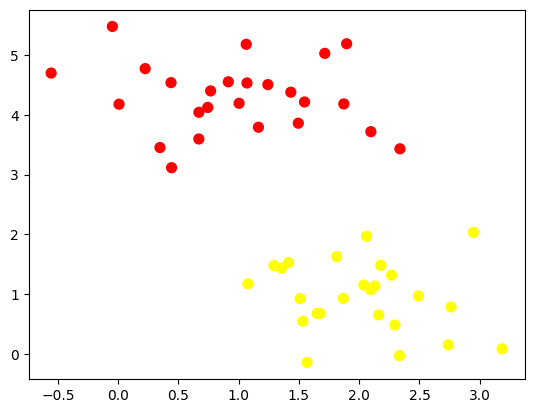

In [81]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Step 3 - Create Illustration of Decision Boundary

To construct a classification model, a decision boundary separating the two formed sets is required. However, this situation still leaves cases in which more than one decision boundary may be appropriate. The multiplicity of decision boundaries indicates several possible classifications for a new data point. A new data point 'x' may appear at a position different from those in the two existing sets and thus may not belong to either of the prior categories.

## Step 4 - Margin Illustration

(-1.0, 3.5)

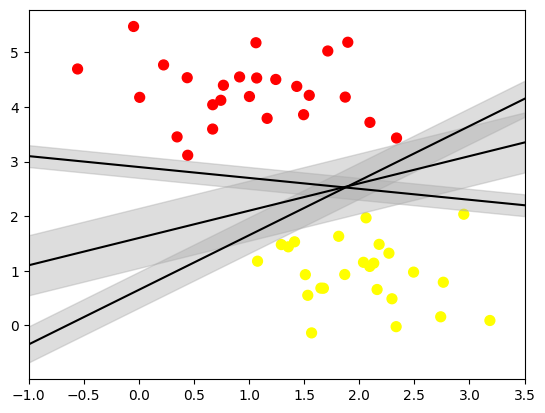

In [82]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Step 5 - Model Fitting

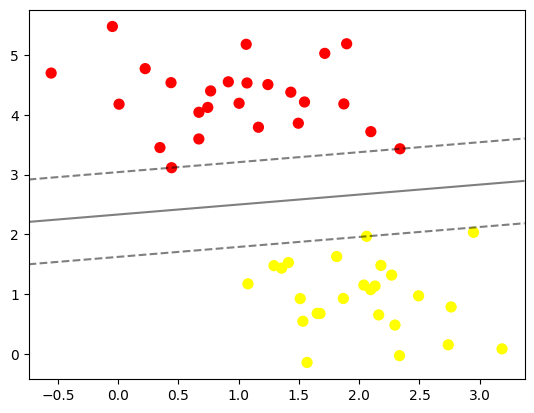

In [83]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

# create a function to display the data fit

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create a grid for model evaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [84]:
!pip install ipywidgets

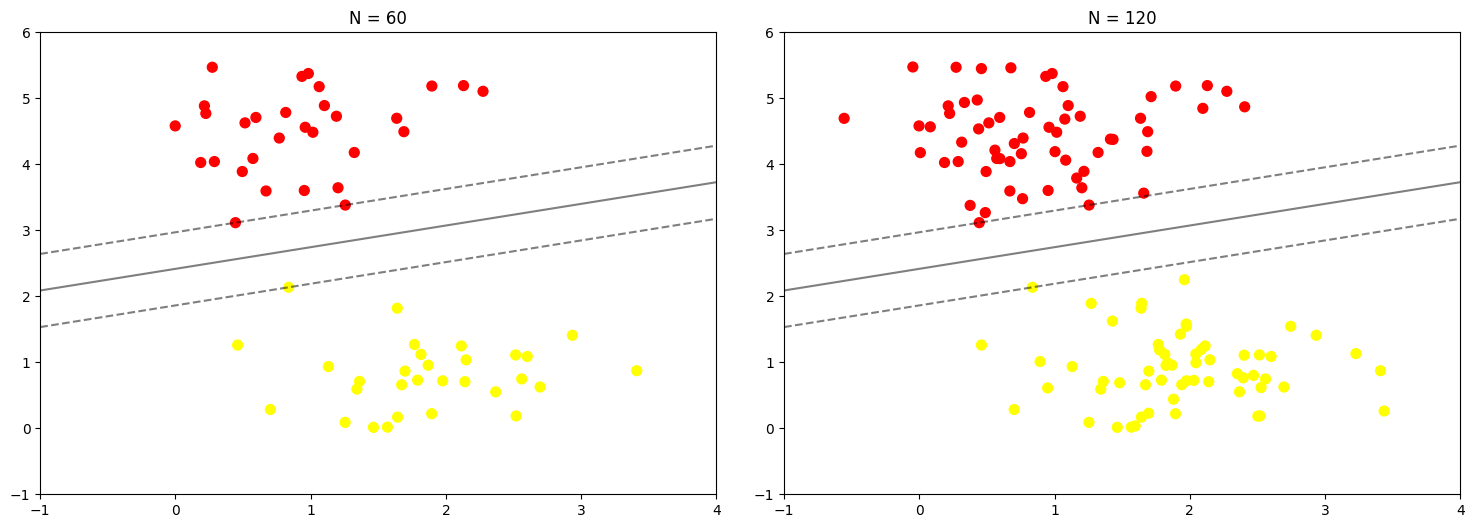

In [85]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [86]:
# the sample size may be chosen between 10 or 200 data points; no change to the model is observed

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# **Lab 2**

## **Step 1 - Illustration of Non-Linear Data**

### Step 1a - Import Libraries

In [87]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Step 1b - Recreate the Plotting Function

In [88]:
# create a function to display model fitting

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create a grid for model evaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Step 1c - Create Non-Linear Dummy Data

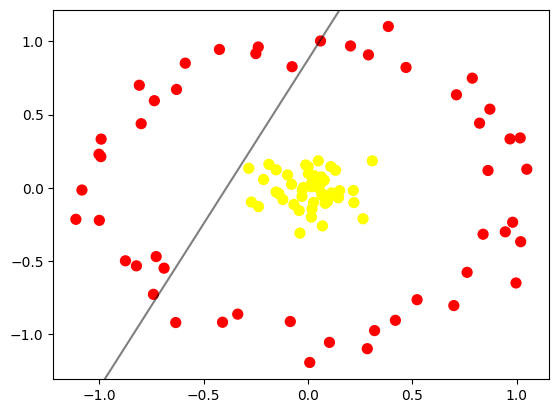

In [89]:
# example of non-linearly separable data
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Step 2 - Model Fitting

In [90]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

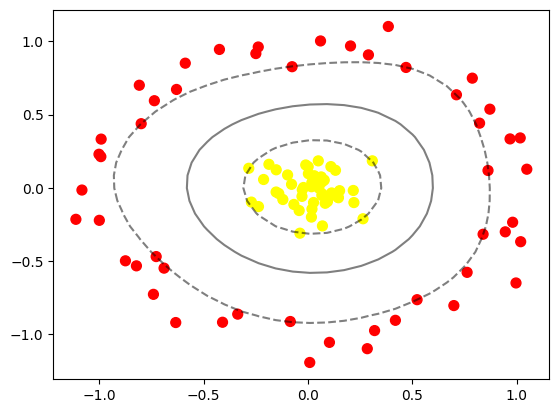

In [91]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# **Lab 3**

## Step 1 - Import Libraries and Create Plotting Function

In [92]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [93]:
# create a function to display the data fitting

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create a grid for model evaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Step 2 - Create Dummy Data

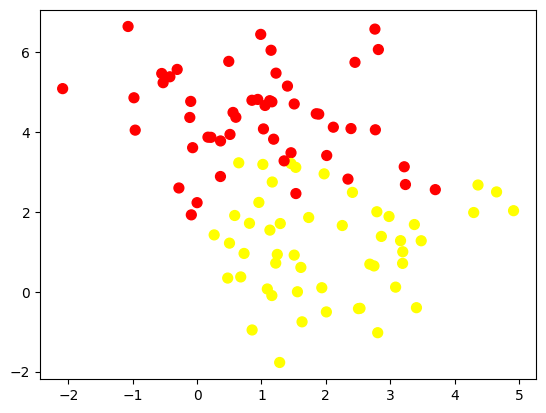

In [94]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Step 3 - Analyze the Impact of Tuning

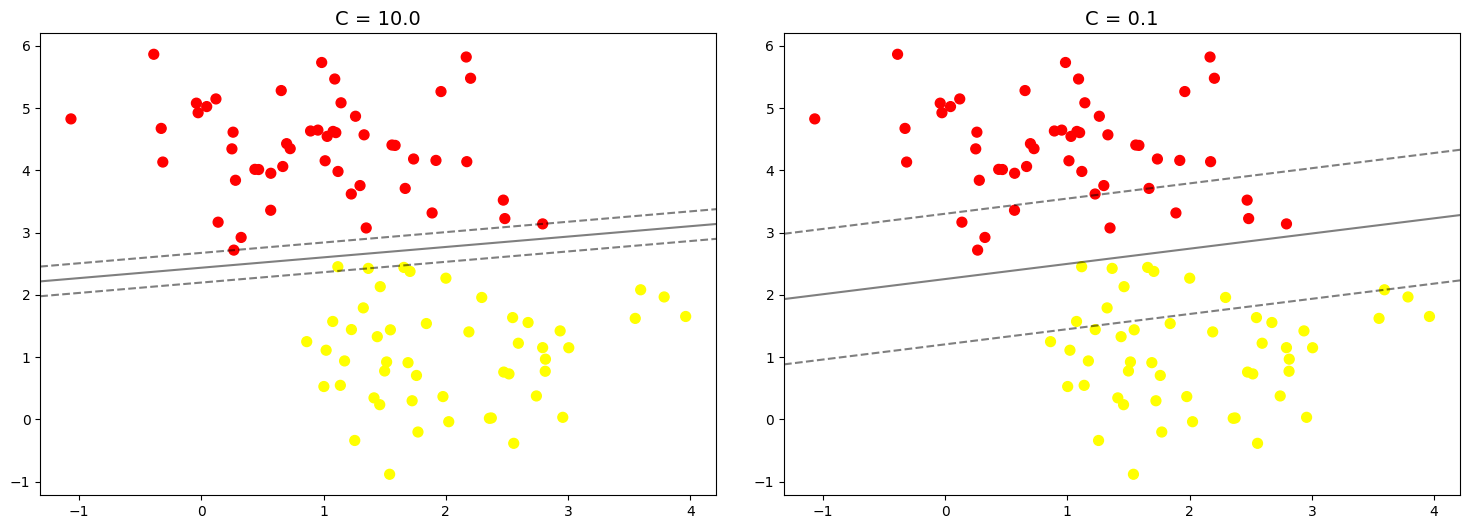

In [95]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# **Lab 4**

## Step 0 - Download the Dataset

In [96]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## Step 1 - Inspect Facial Images

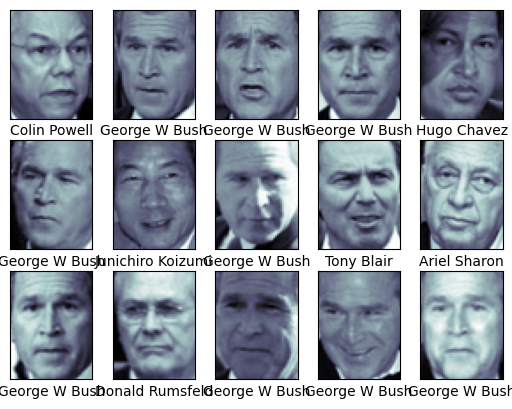

In [97]:
# example faces used
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Step 2 - Data Preprocessing

In [98]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline is used to perform processes sequentially in
# a single function execution
model = make_pipeline(pca, svc)

## Step 3 - Split Data

In [99]:
# separation of training and testing data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## Step 4 - Model Creation + Tuning

In [100]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 38s, sys: 104 ms, total: 1min 38s
Wall time: 1min 6s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [101]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

## Step 5 - Check Prediction Results

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

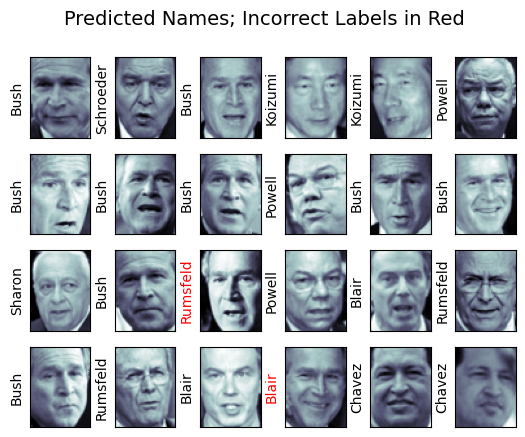

In [102]:
# labels of the testing data

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

## Step 6 - Check Performance

In [103]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

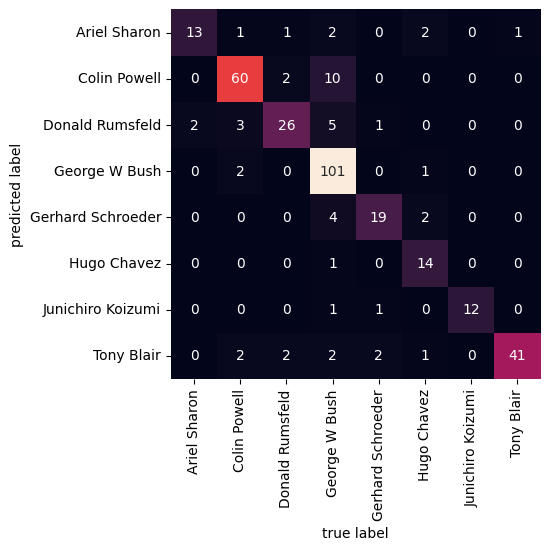

In [104]:
# construct confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **Lab 5**

## Step 0 - Import Libraries

In [105]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [106]:
# Image directories
train_dir = "/content/drive/MyDrive/ML/images/training"
test_dir = "/content/drive/MyDrive/ML/images/test"

## Step 1 - Load Data and Visualize

In [107]:
# def load_dataset(img_dir):
#     p = Path(img_dir)
#     dirs = p.glob('*')

#     img_list = []

#     for dir in dirs:
#         label = str(dir).split('/')[-1]
#         for file in dir.glob('*.jpg'):
#             img = mpimg.imread(file)

#             if not img is None:
#                 img_list.append((img, label))

#     return img_list
def load_dataset(img_dir):
    p = Path(img_dir)

    img_list = []
    for class_folder in p.iterdir():
        if class_folder.is_dir():
            label = class_folder.name
            for ext in ['*.jpg','*.JPG','*.jpeg','*.JPEG','*.png','*.PNG']:
                for file in class_folder.glob(ext):
                    # skip mac metadata files
                    if file.name.startswith("._"):
                        continue
                    try:
                        img = cv2.imread(str(file))
                        if img is not None:
                            img_list.append((img, label))
                    except:
                        pass
    return img_list

In [108]:
# # Load training data
# train_img = load_dataset(train_dir)
train_img = load_dataset(train_dir)
print("Loaded images =", len(train_img))

Loaded images = 240


In [109]:
for cls in ["night","day"]:
    folder = Path(train_dir) / cls
    print("Folder:", cls)
    print([f.name for f in folder.iterdir()])

Folder: night
['20151102_184946.jpg', '20151102_065042.jpg', '20151102_012049.jpg', '20151102_191409.jpg', '20151102_021402.jpg', '20151102_065512.jpg', '20151102_182444.jpg', '20151101_112505.jpg', '20151102_185223.jpg', '20151103_034535.jpg', '20151102_175001.jpg', '20151102_103048.jpg', '20151102_221039.jpg', '20151102_214052.jpg', '20151102_181409.jpg', '20151102_042051.jpg', '20151101_233123.jpg', '20151102_055500.jpg', '20151102_034133.jpg', '20151102_081938.jpg', '20151102_212235.jpg', '20151101_095505.jpg', '20151102_023547.jpg', '20151102_015052.jpg', '20151102_193147.jpg', '20151102_020536.jpg', '20151102_215224.jpg', '20151101_122510.jpg', '20151109_003120.jpg', '20151102_022047.jpg', '20151101_125509.jpg', '20151116_012254.jpg', '20151102_055050.jpg', '20151102_174442.jpg', '20151101_092511.jpg', '20151116_032330.jpg', '20151103_044539.jpg', '20151102_183443.jpg', '20151102_003122.jpg', '20151102_062501.jpg', '20151108_185603.jpg', '20151102_190444.jpg', '20151102_093044.jp

In [110]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[71, 79, 78],
         [69, 77, 76],
         [66, 74, 73],
         ...,
         [61, 60, 62],
         [69, 68, 70],
         [74, 73, 75]],
 
        [[71, 79, 78],
         [69, 77, 76],
         [66, 74, 73],
         ...,
         [52, 51, 53],
         [55, 54, 56],
         [57, 56, 58]],
 
        [[70, 78, 77],
         [68, 76, 75],
         [65, 73, 72],
         ...,
         [46, 45, 47],
         [45, 44, 46],
         [44, 43, 45]],
 
        ...,
 
        [[73, 85, 95],
         [73, 85, 95],
         [72, 84, 94],
         ...,
         [46, 56, 66],
         [46, 56, 66],
         [44, 56, 66]],
 
        [[73, 85, 95],
         [73, 85, 95],
         [72, 84, 94],
         ...,
         [46, 56, 66],
         [46, 56, 66],
         [44, 56, 66]],
 
        [[73, 85, 95],
         [73, 85, 95],
         [72, 84, 94],
         ...,
         [46, 56, 66],
         [46, 56, 66],
         [44, 56, 66]]], dtype=uint8),
 'night')

In [111]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 44
(458, 800, 3)


In [112]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (439, 640, 3)
Label	: night


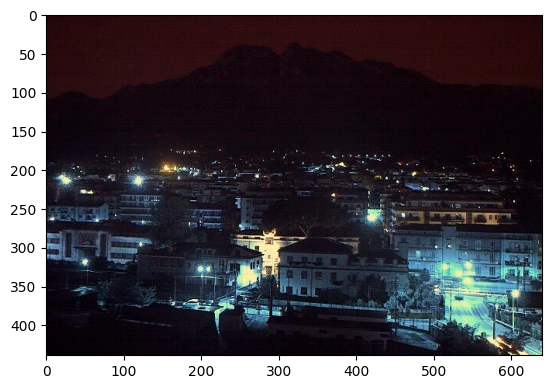

In [113]:
random_img_viz(train_img)

## Step 3 - Data Preprocessing

In [114]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [115]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [116]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [117]:
train_std_img_list = preprocess(train_img)

In [118]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 194
(600, 1100, 3)


## Step 4 - Feature Extraction

In [119]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 115
Avg Brighness: 13.7869


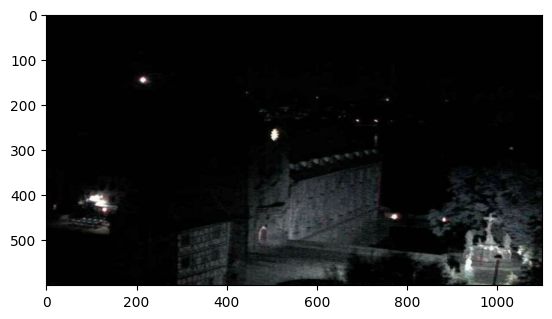

In [120]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Step 5 - Classification using Threshold Method

In [121]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 198
Actual label: 1
Predicted label: 1


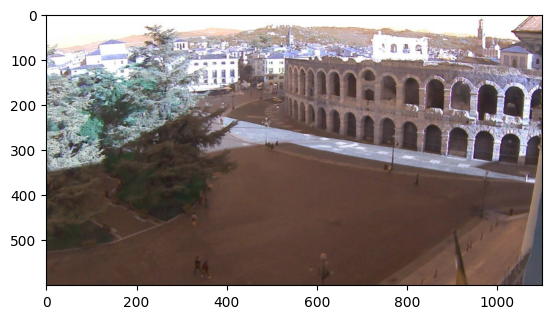

In [122]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Step 6 - Manual Evaluation

In [123]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [124]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [125]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Classification with SVM

## Alternative Step 4 - Constructing Feature Vectors.

In [126]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [127]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,99.819608,0.0
1,113.663214,0.0
2,119.603174,0.0
3,37.548582,0.0
4,25.773092,0.0


In [128]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,129.381088,1.0
1,157.650256,1.0
2,117.273579,1.0
3,129.345136,1.0
4,157.826662,1.0


## Step 5 - Build SVM Model

In [129]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

## Step 6 - Evaluation

In [130]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# **Lab Assignment**

1. Construct an SVM model using the data voice.csv under the following conditions,

a. Split the data using ratios of 70:30 and 80:20 for each model to be developed.

i. Use a model with a linear kernel.

ii. Use a model with a polynomial kernel.

iii. Use a model with an RBF kernel.

b. Tabulate the performance of each split and kernel based on the accuracy metric.

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/drive/MyDrive/ML/voice.csv")

le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

X = df.drop(columns=["label"])
y = df["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def evaluate_svm(test_ratio):
    results = {}
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_ratio, random_state=42
    )

    for kernel in ["linear", "poly", "rbf"]:
        svm_model = SVC(kernel=kernel)
        svm_model.fit(X_train, y_train)
        pred = svm_model.predict(X_test)
        results[kernel] = accuracy_score(y_test, pred)

    return results

results_70 = evaluate_svm(0.30)
results_80 = evaluate_svm(0.20)

print('70:80 :', results_70)
print('80:20 :', results_80)

70:80 : {'linear': 0.9705573080967402, 'poly': 0.9568874868559412, 'rbf': 0.9810725552050473}
80:20 : {'linear': 0.9763406940063092, 'poly': 0.9684542586750788, 'rbf': 0.9826498422712934}


Question 1 conclusion : For the 70:30 split, the accuracies for the linear, polynomial, and RBF kernels were 0.9706, 0.9569, and 0.9811, respectively. In the case of the 80:20 split, the same kernel order resulted in accuracies of 0.9763, 0.9685, and 0.9826. The RBF kernel was found to be superior in terms of accuracy across both split ratios, while the polynomial kernel was the least effective. The increase of the training data proportion from 70% to 80% indicated a slight improvement in the classification performance, showing that the predictive capability of all models was stable and strong.

2. Use the data from practical session 5 to develop a daytime and nighttime classification model using an SVM with an RBF kernel employing histogram features. Use an 80:20 ratio. You may experiment with hyperparameter tuning of the RBF kernel. Record the accuracy performance!

In [132]:
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

def extract_histogram(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))

    hist = []
    for i in range(3):
        h = cv2.calcHist([img], [i], None, [256], [0, 256])
        hist.extend(h.flatten())
    return np.array(hist)

def load_dataset(folder_path):
    X = []
    y = []

    for label, folder in enumerate(["day", "night"]):
        folder_dir = os.path.join(folder_path, folder)
        for file in tqdm(os.listdir(folder_dir), desc=f"Loading {folder} images"):
            img_path = os.path.join(folder_dir, file)
            features = extract_histogram(img_path)
            X.append(features)
            y.append(label)

    return np.array(X), np.array(y)

train_path = "/content/drive/MyDrive/ML/images/training"
test_path  = "/content/drive/MyDrive/ML/images/test"

X_train_full, y_train_full = load_dataset(train_path)
X_test, y_test = load_dataset(test_path)

Loading day images:   0%|          | 0/120 [00:00<?, ?it/s]

Loading night images:   0%|          | 0/120 [00:00<?, ?it/s]

Loading day images:   0%|          | 0/80 [00:00<?, ?it/s]

Loading night images:   0%|          | 0/80 [00:00<?, ?it/s]

In [133]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_val)
baseline_acc = accuracy_score(y_val, y_pred)
print("Baseline RBF Accuracy:", baseline_acc)

Baseline RBF Accuracy: 1.0


In [134]:
params = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.01, 0.001, 0.0001]
}

grid = GridSearchCV(SVC(kernel='rbf'), params, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

best_svm = grid.best_estimator_
y_pred_tuned = best_svm.predict(X_val)
tuned_acc = accuracy_score(y_val, y_pred_tuned)
print("Tuned Model Accuracy:", tuned_acc)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best params: {'C': 10, 'gamma': 'scale'}
Tuned Model Accuracy: 1.0


In [135]:
y_test_pred = best_svm.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Final Test Accuracy:", test_acc)

Final Test Accuracy: 0.975


Question number 2 conclusion : RBF-SVM model got an accuracy of 1.0 on the validation set. The best parameters (C = 10, gamma = scale) were determined after hyperparameter tuning with GridSearchCV, keeping a validation accuracy of 1.0. Testing on the data that was not seen before gave an accuracy of 0.975, indicating that day and night images were classified effectively with very little loss in performance.